# Essentials of Machine Learning Algorithms

This notebook is used to showed basic machine learning algorithms.

In [1]:
# Auto-generated table of content
from jyquickhelper import add_notebook_menu
add_notebook_menu(last_level=3)

## Machine Learning Algorithm Types
### 1. Supervised Learning

This algorithm consist of a **target/outcome** variable (or dependent variable) which is to be predicted from a given set of predictors (independent variables). Using these set of variables, **we generate a function that map inputs to desired outputs**. The training process continues until the model achieves a desired level of accuracy on the training data. Examples of Supervised Learning: Regression, Decision Tree, Random Forest, KNN, Logistic Regression etc.

### 2. Unsupervised Learning
In this algorithm, we **do not have any target/outcome** variable to predict/estimate.  It is used for clustering population in different groups, which is widely used for segmenting customers in different groups for specific intervention. Examples of Unsupervised Learning: Apriori algorithm, K-means.

### 3. Reinforcement Learning
Using this algorithm, the machine is trained to make specific decisions. It works this way: the **machine is exposed to an environment where it trains itself continually using trial and error**. This machine learns from past experience and tries to capture the best possible knowledge to make accurate business decisions. Example of Reinforcement Learning: Markov Decision Process

## Common Machine Learning Algorithms
Here is the list of commonly used machine learning algorithms. These algorithms can be applied to almost any data problem:

1. Linear Regression
2. Logistic Regression
3. Decision Tree
4. SVM
5. Naive Bayes
6. kNN
7. K-Means
8. Random Forest
9. Dimensionality Reduction Algorithms
10. Gradient Boosting algorithms<br>
    a. GBM<br>
    b. XGBoost<br>
    c. LightGBM<br>
    d. CatBoost<br>

Below are algorithm descriptions with code


In [2]:
import numpy as np   # math library
import pandas as pd  # dataframe library 

In [3]:
# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

## 1. Linear Regression
It is used to estimate real values (cost of houses, number of calls, total sales etc.) based on continuous variable(s). Here, we **establish relationship** between **independent** and **dependent variables** by **fitting a best line**. This best fit line is known as regression line and represented by a linear equation

$$Y= a\cdot X + b\tag{1.1}$$

The best way to understand linear regression is to relive this experience of childhood. Let us say, you ask a child in fifth grade to arrange people in his class by increasing order of weight, without asking them their weights! What do you think the child will do? He/she would likely look (visually analyze) at the height and build of people and arrange them using a combination of these visible parameters. This is linear regression in real life! The child has actually figured out that height and build would be correlated to the weight by a relationship, which looks like the equation above.

In equation (1.1):

- $Y$ – Dependent Variable
- $a$ – Slope/Coefficient
- $X$ – Independent variable
- $b$ – Intercept/Bias

These coefficients $a$ and $b$ are derived based on **minimizing the sum of squared difference of distance** between data points $Y$ and regression line $\hat{Y}$:

$$\sum(\hat{Y}-Y)^2\tag{1.2}$$

Look at the below example. Here we have identified the best fit line having linear equation $y=0.2811x+13.9$. Now using this equation, we can find the weight, knowing the height of a person.
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Linear_Regression.png)

Linear Regression is of mainly two types: **Simple** Linear Regression and **Multiple** Linear Regression. Simple Linear Regression is characterized by **one independent** variable. And, Multiple Linear Regression(as the name suggests) is characterized by **multiple** (more than 1) **independent** variables. While finding best fit line, you can fit a polynomial or curvilinear regression. And these are known as polynomial or curvilinear regression.

### 1.1 Simple Linear Regression

In [8]:
# Import Library
# Import other necessary libraries like pandas, numpy...
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [20]:
# Load Train and Test datasets
# We do it by generation

# independent variable
X = np.arange(-5, 10, 0.05)

# true value
Y = 2*X + 3

# noise
np.random.seed(42)
Z = np.random.normal(size=len(X))

# add noise to true value
Y_true = Y + Z

# reshape for model
X = X.reshape(-1, 1)
Y_true = Y_true.reshape(-1, 1)

# split to train/test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_true,test_size=0.2)

In [21]:
# Create linear regression object
linear = linear_model.LinearRegression()

# Train the model using the training sets and check R^2 score
linear.fit(X_train, Y_train)
linear.score(X_train, Y_train)

0.9874635382351064

In [32]:
# Equation coefficient and Intercept
print('Coefficient:', linear.coef_, '~2')
print('Intercept/Bias:', linear.intercept_, '~3')
print('Linear model:', 'Y = '+str(linear.coef_[0][0])+'X + '+str(linear.intercept_[0]))

Coefficient: [[2.01253793]] ~2
Intercept/Bias: [2.99408485] ~3
Linear model: Y = 2.01253793091767X + 2.9940848471693444


In [33]:
# calculate mean squared error on train/test dataset
# train set
Y_train_hat = linear.predict(X_train)
mse_train = mean_squared_error(y_true=Y_train, y_pred=Y_train_hat)
print('Mean squared error on train set:', mse_train)  # 0.9655915183765666

Y_test_hat = linear.predict(X_test)
mse_test = mean_squared_error(y_true=Y_test, y_pred=Y_test_hat)
print('Mean squared error on test set:', mse_test)  # 0.9518984871189602

Mean squared error on train set: 0.9655915183765666
Mean squared error on test set: 0.9518984871189602


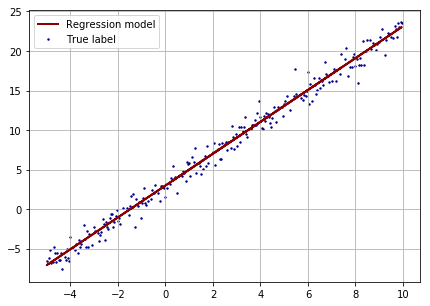

In [40]:
# visualization results
plt.figure(figsize=(7,5))
plt.scatter(x=X_train, y=Y_train, s=2, c='darkblue',label='True label')
plt.plot(X_train, Y_train_hat, c='darkred', linewidth=2, label='Regression model')
plt.legend()
plt.grid(True)

### 1.2 Multiple Linear Regression

In [4]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [1]:
# https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/
# https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155